In [1]:
import torch
from PIL import Image
from matplotlib import pyplot as plt
from torchvision import transforms as T

from zprp.models.cycle_gan.components import SemanticRegularization

In [2]:
def unnormalize(x: torch.Tensor) -> torch.Tensor:
    return (x * 0.5) + 0.5

In [5]:
def load_and_transform_image(image_path):
    image = Image.open(image_path)
    transform = T.Compose([
        T.ToTensor(),
        T.Resize((256, 256)),
        T.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])
    return transform(image)


car1 = load_and_transform_image("../data/test_semantic/car1.jpg")
car2 = load_and_transform_image("../data/test_semantic/car2.jpg")
tracktor = load_and_transform_image("../data/test_semantic/tracktor.jpg")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


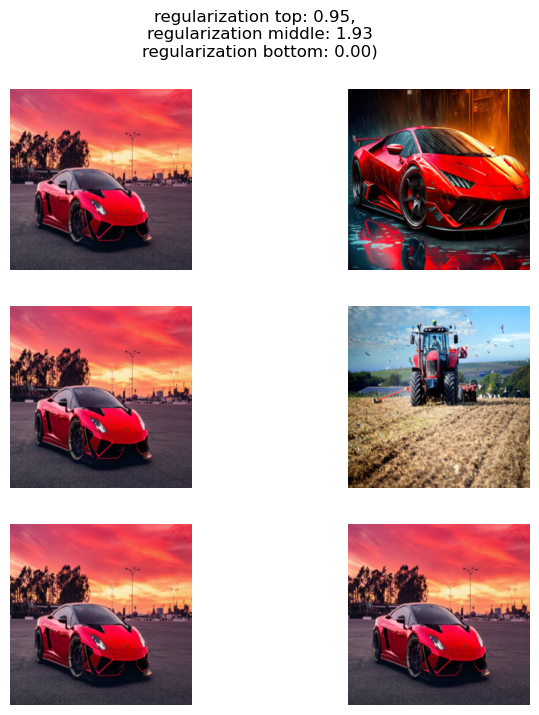

In [6]:
semantic_regularization = SemanticRegularization(beta_param=10)

regularization1_2 = semantic_regularization(car1.unsqueeze(0), car2.unsqueeze(0))
regularization3_4 = semantic_regularization(car1.unsqueeze(0), tracktor.unsqueeze(0))
regularization1_1 = semantic_regularization(car1.unsqueeze(0), car1.unsqueeze(0))

fig, axes = plt.subplots(
    3,
    2,
    figsize=(8, 8),
)
for ax in axes.reshape(-1):
    ax.axis("off")
axes[0, 0].imshow(unnormalize(car1.permute(1, 2, 0).numpy()))
axes[0, 1].imshow(unnormalize(car2.permute(1, 2, 0).numpy()))
axes[1, 0].imshow(unnormalize(car1.permute(1, 2, 0).numpy()))
axes[1, 1].imshow(unnormalize(tracktor.permute(1, 2, 0).numpy()))
axes[2, 0].imshow(unnormalize(car1.permute(1, 2, 0).numpy()))
axes[2, 1].imshow(unnormalize(car1.permute(1, 2, 0).numpy()))
fig.suptitle(
    f"regularization top: {regularization1_2:.2f},  \n"
    f"regularization middle: {regularization3_4:.2f}\n"
    f"regularization bottom: {regularization1_1:.2f})"
)
plt.show()

- similar images have low penalty
- different images have higher penalty
- identical images have no penalty